# 50_statrtups

In [39]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
upload=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [41]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#data['State']=le.fit_transform(data['State'])
#data.drop('Sate',axis=1,inplace=True)
#data.head()
data=pd.get_dummies(data,columns=['State'])
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [43]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<Axes: >

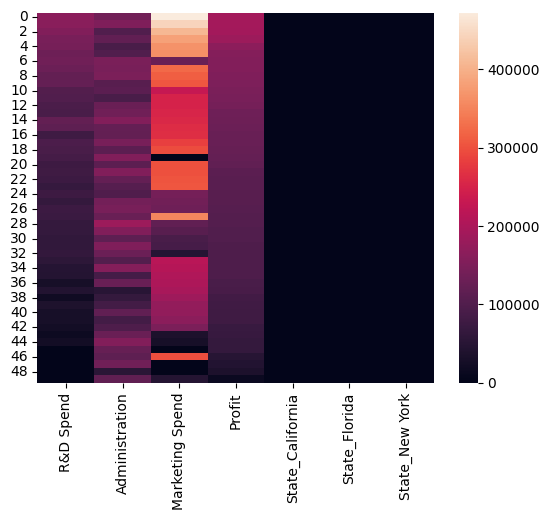

In [ ]:
import seaborn as sns
sns.heatmap(data=data)

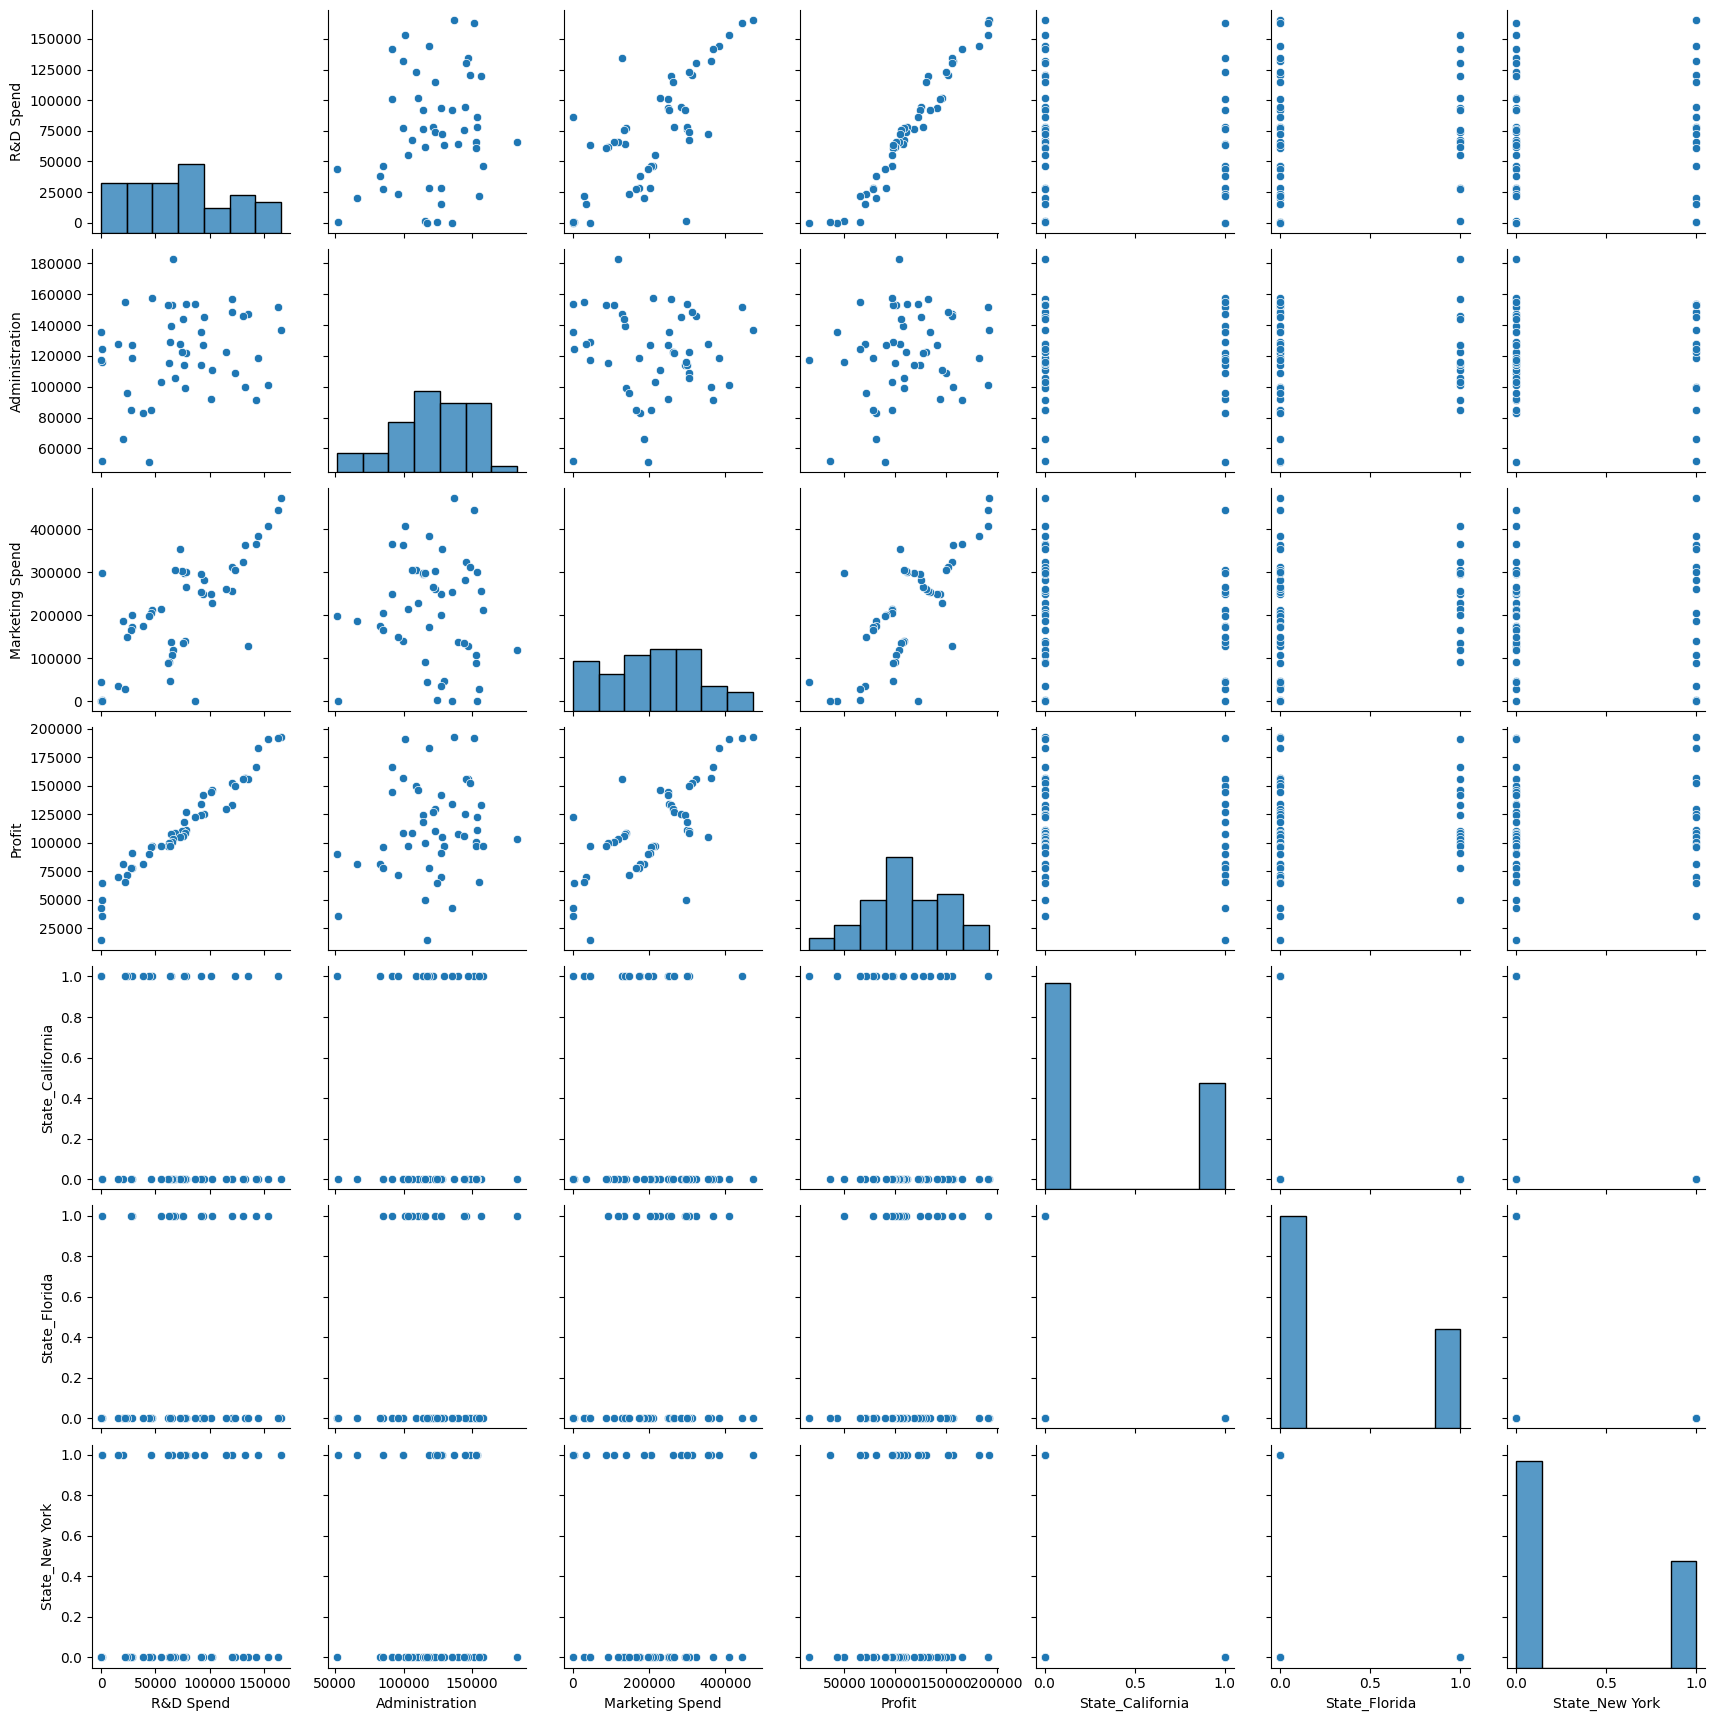

In [67]:
sns.pairplot(data=data)

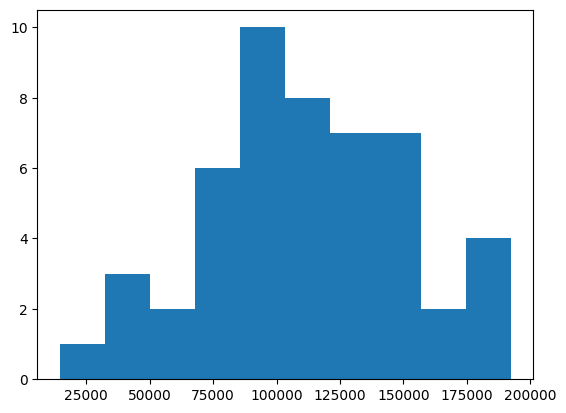

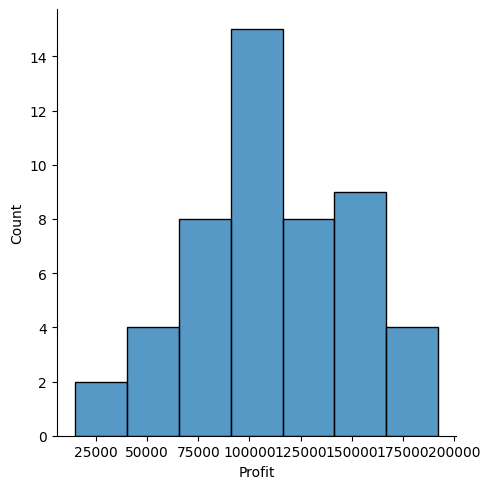

In [73]:
import matplotlib.pyplot as plt
plt.hist(data['Profit'])
sns.displot(data['Profit'])

It is a left-skewed data


In [ ]:
X=data.iloc[:,[0,1,2,4,5,6]]
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [ ]:
Y=data.iloc[:,3]
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [56]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=200)

In [74]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
5,131876.90,99814.71,362861.36,0,0,1
2,153441.51,101145.55,407934.54,0,1,0
46,1315.46,115816.21,297114.46,0,1,0
30,61994.48,115641.28,91131.24,0,1,0
34,46426.07,157693.92,210797.67,1,0,0


In [75]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
33,55493.95,103057.49,214634.81,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
31,61136.38,152701.92,88218.23,0,0,1
28,66051.52,182645.56,118148.20,0,1,0
20,76253.86,113867.30,298664.47,1,0,0


# LinearRegression(50_Startups)

In [78]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)
lreg_pred_ytrain=lreg.predict(x_train)

# Generate Prediction on test set
lreg_pred_ytest = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_pred_ytest - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


Mean squared Error on test set :  154062171.28878224
            Columns  Coefficient Estimate
0         R&D Spend              0.783747
1    Administration             -0.016394
2   Marketing Spend              0.024145
3  State_California           1261.331311
4     State_Florida           -308.327264
5    State_New York           -953.004047


In [79]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,lreg_pred_ytrain)
r2_test=r2_score(y_test,lreg_pred_ytest)
(r2_train,r2_test)

(0.960024485294055, 0.8798449716509686)

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

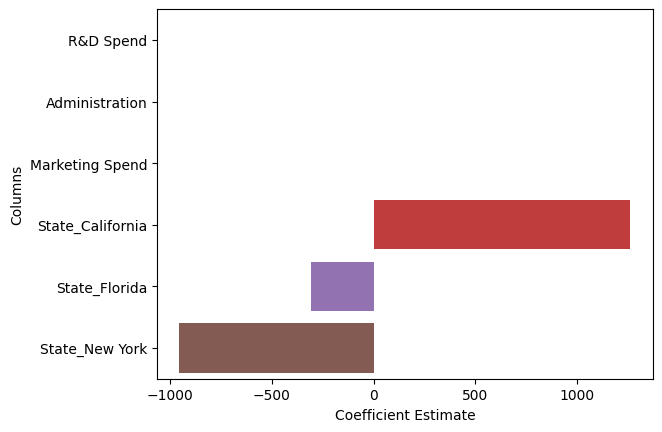

In [60]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate',y='Columns',data=lreg_coefficient,orient='h')

# Ridge Regression(50_Startups)

In [81]:
from sklearn.linear_model import Ridge,Lasso
ridgeR = Ridge(alpha = 0.98)
ridgeR.fit(x_train, y_train)
y_ridgepred_train=ridgeR.predict(x_train)
y_ridgepred_test = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_ridgepred_test - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

153364898.62993318
            Columns  Coefficient Estimate
0         R&D Spend              0.783692
1    Administration             -0.016298
2   Marketing Spend              0.024144
3  State_California           1174.130482
4     State_Florida           -284.959555
5    State_New York           -889.170927


In [82]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,y_ridgepred_train)
r2_test=r2_score(y_test,y_ridgepred_test)
(r2_train,r2_test)

(0.9600219789984902, 0.8803887833822338)

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

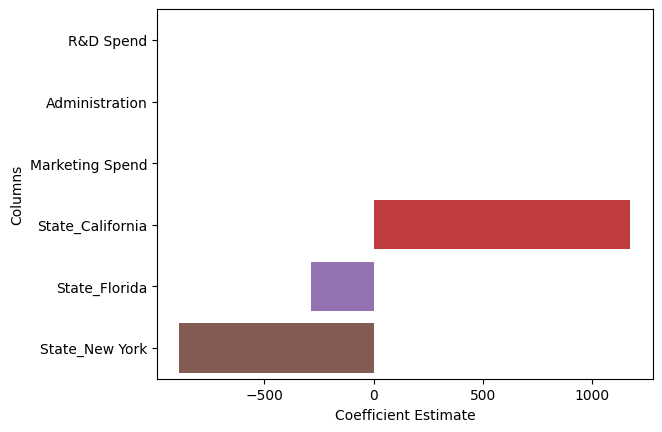

In [65]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate',y='Columns',data=ridge_coefficient,orient='h')

# Lasso Regression(50_startups)

In [84]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 0.0001)
lasso.fit(x_train, y_train)
lasso_pred_ytrain=lasso.predict(x_train)
lasso_pred_ytest = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((lasso_pred_ytest - y_test)**2)
print("Mean squared error on test set", mean_squared_error)

lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)



Mean squared error on test set 154062170.00458968
            Columns  Coefficient Estimate
0         R&D Spend              0.783747
1    Administration             -0.016394
2   Marketing Spend              0.024145
3  State_California           2009.911004
4     State_Florida            440.252315
5    State_New York           -204.423959


In [85]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,lasso_pred_ytrain)
r2_test=r2_score(y_test,lasso_pred_ytest)
(r2_train,r2_test)

(0.9600244852940549, 0.8798449726525266)

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

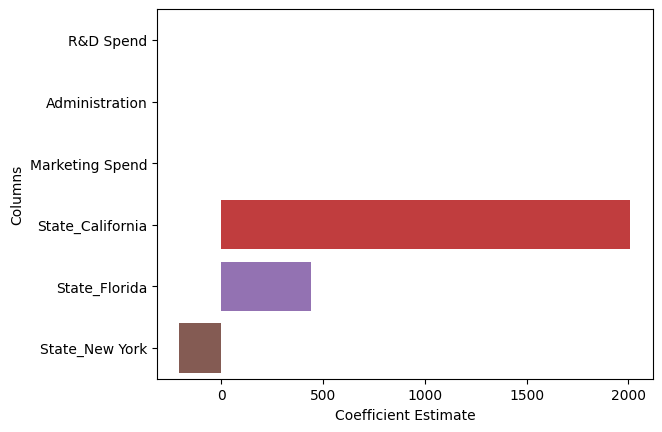

In [76]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate',y='Columns',data=lasso_coeff,orient='h')

By checking the mean Square Error and Accuracy ridge model is giving the maximum value compared to the other values.Ridge Model is prefered for this project

# Toyota Corolla

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
upload=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [159]:
data=pd.read_csv('ToyotaCorolla.csv',encoding = "Latin-1", sep = ",")
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [160]:
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [161]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [162]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [164]:
data=data.loc[:,['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Price']]
data.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [166]:
data.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


<Axes: >

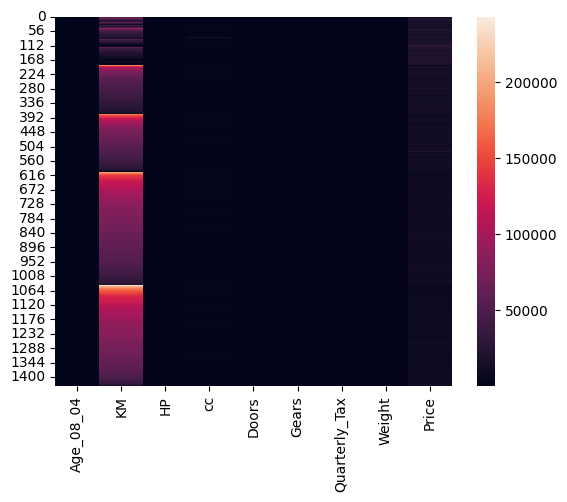

In [167]:
sns.heatmap(data=data)

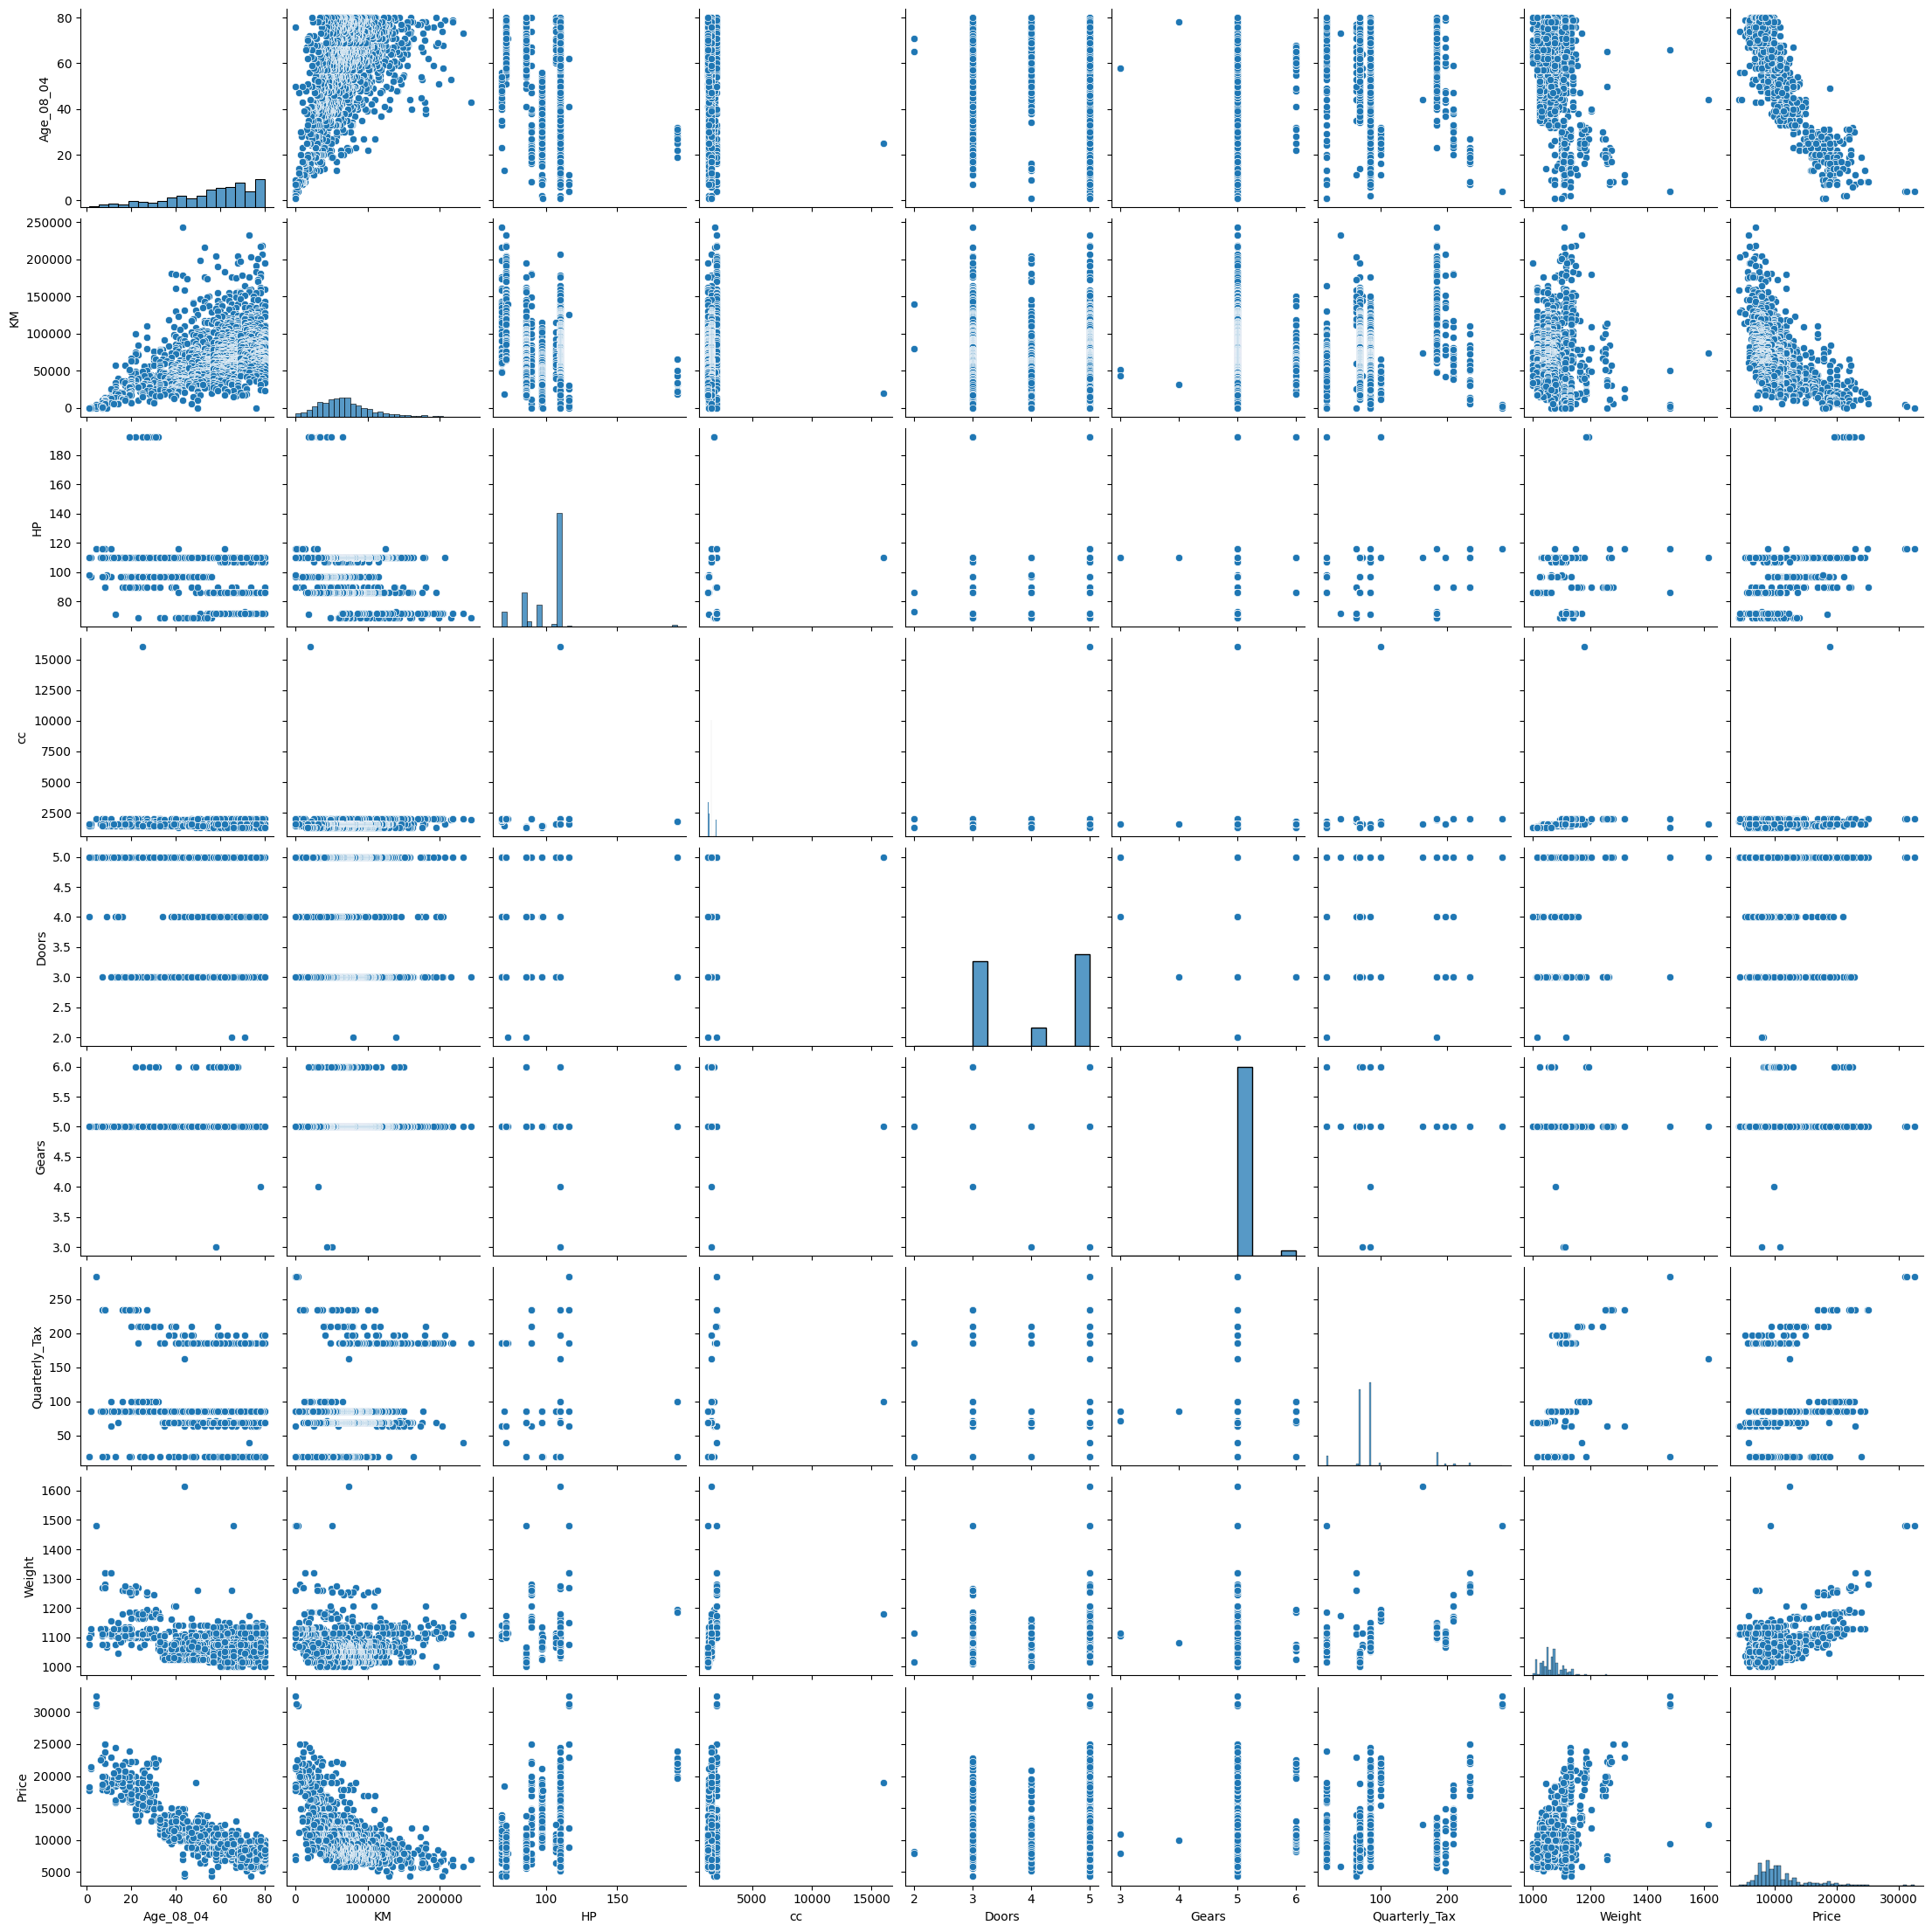

In [168]:
sns.pairplot(data=data)

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

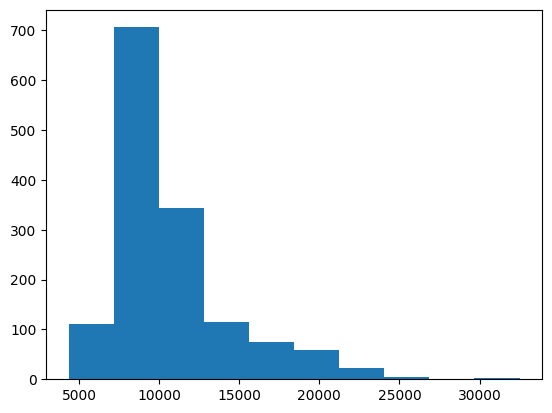

In [169]:
plt.hist(data['Price'])

**The data of the Price is Right Skewed**

In [118]:
x=data.loc[:,['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
y=data.iloc[:,2]
x

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [154]:
x.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [119]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

In [124]:
lreg_coefficient.drop('Coefficient Estimate',axis=1,inplace=True)

## linearregression(Toyota)

In [130]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred_teain=regressor.predict(x_train)
y_pred_test=regressor.predict(x_test)
mse=np.mean((y_pred_test-y_test)**2)
lreg_coeffiecient=pd.DataFrame()
lreg_coefficient['Columns']=x_train.columns
lreg_coefficient['model_values']=pd.Series(regressor.coef_)
print('Mean_Square_Error  :',mse)
lreg_coefficient

Mean_Square_Error  : 2399722.7168157464


,Columns,model_values
0,Age_08_04,-116.227801
1,KM,-0.022002
2,HP,27.934139
3,cc,-0.118070
4,Doors,-40.851082
5,Gears,603.045610
6,Quarterly_Tax,1.244895
7,Weight,21.258261


<Axes: xlabel='model_values', ylabel='Columns'>

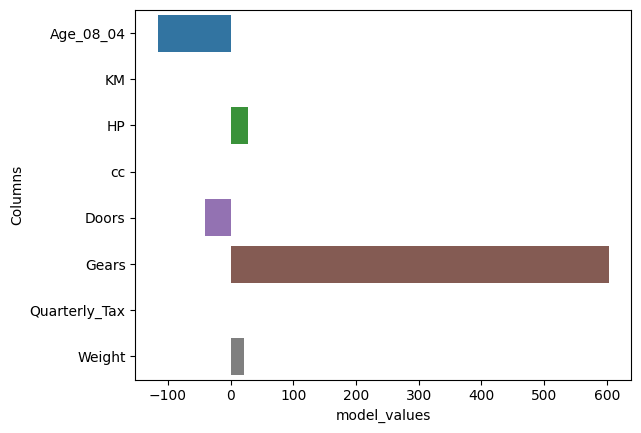

In [131]:
sns.barplot(x='model_values',y='Columns',data=lreg_coefficient,orient='h')

In [133]:
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print(r2_train,r2_test)

0.8757032789586419 0.801264152308993


# ridge regression(Toyota)

In [145]:
ridgeR=Ridge(alpha=0.98)
ridgeR.fit(x_train,y_train)
y_pred_train=ridgeR.predict(x_train)
y_pred_test=ridgeR.predict(x_test)
mse=np.mean((y_pred_test-y_test)**2)
ridge_coeff=pd.DataFrame()
ridge_coeff['Columns']=x_train.columns
ridge_coeff['values']=pd.Series(ridgeR.coef_)
print('Mean Square Values :',mse)
ridge_coeff

Mean Square Values : 2399665.8849631953


,Columns,values
0,Age_08_04,-116.230562
1,KM,-0.021995
2,HP,27.984867
3,cc,-0.118168
4,Doors,-41.413229
5,Gears,587.769194
6,Quarterly_Tax,1.250206
7,Weight,21.258506


In [146]:
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print(r2_train,r2_test)

0.8757027089548782 0.8012688589054315


<Axes: xlabel='values', ylabel='Columns'>

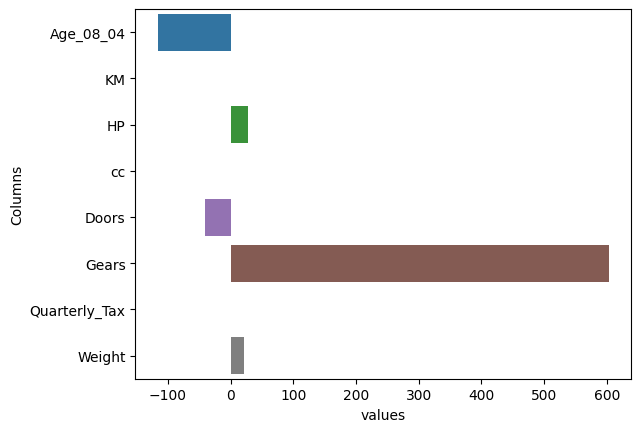

In [138]:
sns.barplot(x='values',y='Columns',data=ridge_coeff,orient='h')

# Lasso Regression(Toyota)

In [150]:
lasso=Lasso(alpha=0.98)
lasso.fit(x_train,y_train)
y_pred_train=lasso.predict(x_train)
y_pred_test=lasso.predict(x_test)
mse=np.mean((y_pred_test-y_test)**2)
lasso_coeff=pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['values']=pd.Series(lasso.coef_)
print('MSE :',mse)
lasso_coeff


MSE : 2399266.8070479375


,Columns,values
0,Age_08_04,-116.230336
1,KM,-0.021991
2,HP,28.023664
3,cc,-0.118189
4,Doors,-40.769627
5,Gears,574.421733
6,Quarterly_Tax,1.257418
7,Weight,21.250692


In [151]:
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print(r2_train,r2_test)

0.8757011881439598 0.8013019090104406


<Axes: xlabel='values', ylabel='Columns'>

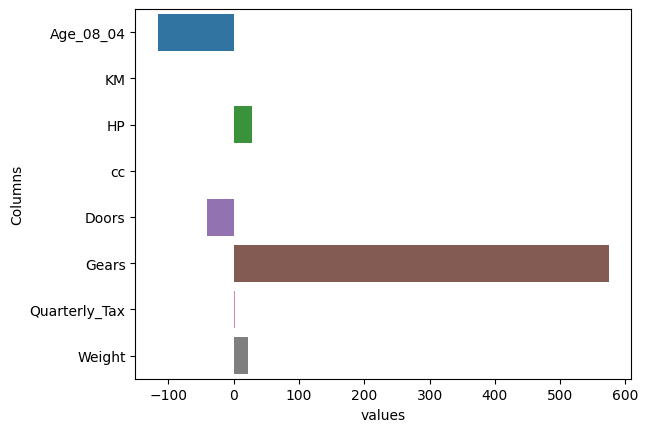

In [153]:
sns.barplot(x='values',y='Columns',data=lasso_coeff,orient='h')

**The mean Square Value of lasso regression is less compared with remaining two models.So,the conclusion is lasso regression model will predict accurate results compaared to the remaining two models**